# Neural network exercises: Classification

In this notebook we try out classification on 2-dimensional "toy" data, which is convenient for visualisation.



In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

`scikit-learn` has a couple of nice functions for generating random data. We start out with the "moons" data, and plot it.

We extend out task a little by also creating a validation dataset, which we will use to check for overfitting.

In [3]:
from sklearn.datasets import make_moons

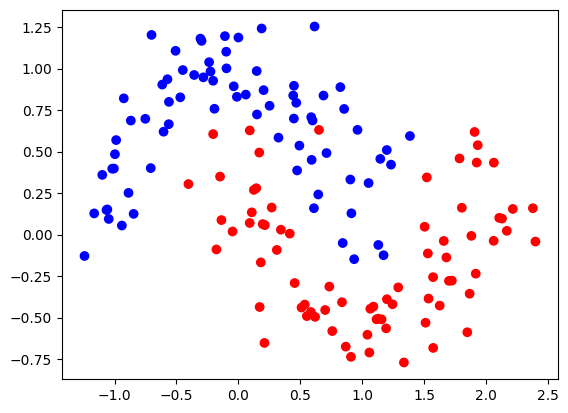

In [4]:
X_train, Y_train = make_moons(n_samples=150, noise=0.2)
X_val, Y_val = make_moons(n_samples=150, noise=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='bwr')

Define the model.
Since we are optimising for a classification task, we choose (binary) cross entropy as loss function. In the `compile` function we can further specify a list of metrics to compute. Here, we choose accuracy.

Notice that in the `fit()` function, we now specify `validation_data`. For each epoch, the loss and accuracy will be computed both for training data, and for the independent validation data. This we will use to monitor the training progress. This is returned as a dictionary -- here we name it `training_history`.

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

training_history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=150,
    verbose=0
)

2023-10-20 09:42:25.226353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 09:42:25.256094: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Super. Let us plot the loss and the accuracy as function of epoch number.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


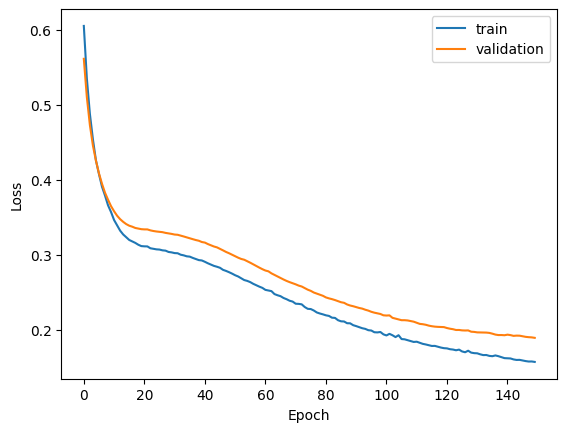

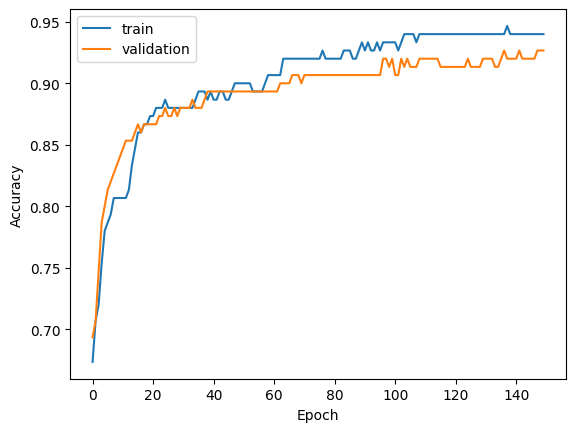

In [6]:
print(training_history.history.keys())

plt.figure()
plt.plot(training_history.history['loss'], label='train')
plt.plot(training_history.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
plt.plot(training_history.history['accuracy'], label='train')
plt.plot(training_history.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

The function below creates a plot of the decision boundary.



In [7]:
def plot_decision_boundary(
    x_values,
    y_values,
    nn_model,
    x_range=(-2, 3),
    y_range=(-1,2),
    text=''
):

    gridsteps=100
    x_span = np.linspace(x_range[0], x_range[1], gridsteps)
    y_span = np.linspace(y_range[0], y_range[1], gridsteps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap='bwr', alpha=0.5)

    train_labels = nn_model.predict(x_values)
    ax.scatter(x_values[:,0], x_values[:,1], c=y_values, cmap='bwr', edgecolors='w')

    ax.set_title(text)

    return fig, ax

Make the actual plot, for **both** training data, and for validation data.

In [ ]:
plot_decision_boundary(X_train, Y_train, model, text="Training data")
plot_decision_boundary(X_val, Y_val, model, text="Validation data")

# Exercise 1

Edit the number of epochs the network is trained for, and look at the loss value curve to see if it indicates convergence or not.

# Exercise 2

Change the sixe of the network so that is visually overfits (when looking at the decicion boundary). What is now the difference between the blue and orange loss value curves? Can we use this to diagnose overfitting?

# Exercise 3

With the over-complicated network from the previous exercise, try to remedy the situation by adding regularisation:
```
    tf.keras.layers.Dense(
        10,
        activation='tanh',
        kernel_regularizer=regularizers.L2(1e-4) # find a useful value
    )
```

# Exercise 4

Generate the "circle-in-circle"-data given by the function below, and create a model that is able to classify it correctly.


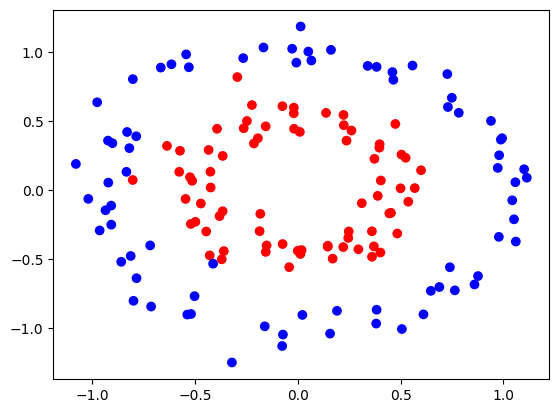

In [9]:
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=150, noise=0.1, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr')